# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer Vision : the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car.

## Get the data

Datasource: [Food 101](https://www.kaggle.com/dansbecker/food-101)

But we're only use two class for introdution 🥴

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-06 05:12:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   139MB/s    in 0.8s    

2021-08-06 05:12:52 (139 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

Meaning visualizing as much as you can.

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dir_paths, dir_names, file_names in os.walk("pizza_steak"):
  print(f"there're {len(dir_names)} directories and {len(file_names)} in '{dir_paths}''")

there're 2 directories and 1 in 'pizza_steak''
there're 2 directories and 1 in 'pizza_steak/train''
there're 0 directories and 750 in 'pizza_steak/train/pizza''
there're 0 directories and 750 in 'pizza_steak/train/steak''
there're 2 directories and 1 in 'pizza_steak/test''
there're 0 directories and 250 in 'pizza_steak/test/pizza''
there're 0 directories and 250 in 'pizza_steak/test/steak''


In [ ]:
# Another way to find out how many images are in the files 
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [ ]:
 # another way
from glob import glob
class_names = [x.split('/')[-1] for x in glob("pizza_steak/train/*")]
class_names = class_names[::-1]
class_names

['steak', 'pizza']

In [ ]:
glob("pizza_steak/train/*/")

['pizza_steak/train/pizza/', 'pizza_steak/train/steak/']

In [ ]:
os.walk("pizza_steak/train/")

<generator object walk at 0x7f72a66d6350>

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image 
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")
  return img

['386335.jpg']
Image shape (307, 512, 3)


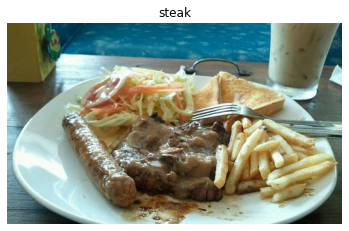

In [ ]:
target_dir = "pizza_steak/train/"
target_class = "steak"

img = view_random_image(target_dir, target_class)

In [ ]:
# view image shape
img.shape

(307, 512, 3)

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(307, 512, 3), dtype=uint8, numpy=
array([[[ 94,  81,  29],
        [ 95,  82,  30],
        [ 96,  83,  31],
        ...,
        [ 10,  50,  62],
        [ 15,  60,  83],
        [  6,  51,  80]],

       [[ 94,  81,  29],
        [ 94,  81,  29],
        [ 95,  82,  30],
        ...,
        [ 17,  56,  71],
        [ 15,  60,  83],
        [  6,  53,  83]],

       [[ 95,  82,  30],
        [ 95,  82,  30],
        [ 95,  82,  30],
        ...,
        [ 20,  62,  78],
        [ 13,  59,  83],
        [  7,  54,  84]],

       ...,

       [[ 96, 124, 125],
        [ 92, 120, 121],
        [ 95, 123, 124],
        ...,
        [ 44,  46,  33],
        [ 45,  47,  34],
        [ 43,  45,  31]],

       [[103, 131, 132],
        [ 99, 127, 128],
        [101, 129, 130],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  28],
        [ 38,  40,  26]],

       [[106, 134, 135],
        [103, 131, 132],
        [104, 132, 133],
        ...,
        [ 37,  39,  2

In [ ]:
# image_norm = image/255

In [ ]:
# image_norm

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Preprocess data (normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our train data
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data), 1500/32 # 1500 images divided into batches

(47, 46.875)

In [ ]:
len(valid_data)

16

In [ ]:
# Build a model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2),
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2),
                            padding="valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile our model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 40s 214ms/step - loss: 0.6158 - accuracy: 0.6460 - val_loss: 0.4106 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4328 - accuracy: 0.8047 - val_loss: 0.3396 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4099 - accuracy: 0.8253 - val_loss: 0.3418 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3828 - accuracy: 0.8360 - val_loss: 0.3059 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3333 - accuracy: 0.8620 - val_loss: 0.3438 - val_accuracy: 0.8560


> 🔑**Note** : Use GPU for faster training

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

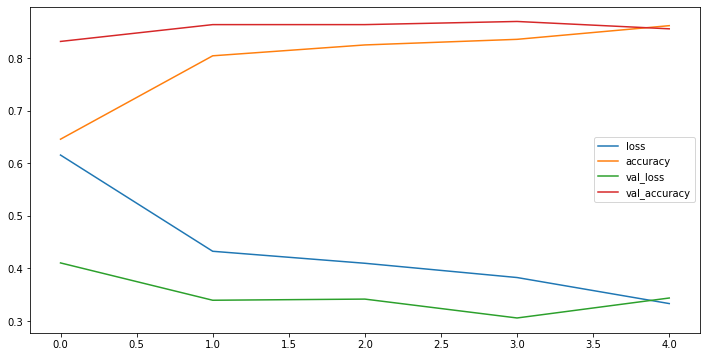

In [ ]:
import pandas as pd

fig, ax = plt.subplots(figsize=(12,6))
pd.DataFrame(history_1.history).plot(ax=ax)

## Let's try using non-CNN

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.0781 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite that model_2 having 20x more parameters than model_1 (CNN) but performs terribly...

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 3.2838 - accuracy: 0.6373 - val_loss: 0.5340 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.0308 - accuracy: 0.7000 - val_loss: 0.8168 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6076 - accuracy: 0.7573 - val_loss: 0.4905 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.9443 - accuracy: 0.7073 - val_loss: 1.4736 - val_accuracy: 0.6240
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5086 - accuracy: 0.7867 - val_loss: 0.4389 - val_accuracy: 0.7920


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with the data: visualize it.
2. Preprocessing data (prepared it for our model, the main step here was scaling, normalizing).
3. Created a model (start with a baseline).
4. Fit the momdel.
5. Evaluate the model.
6. Adjust different hyper-parameter (try to beat our baseline).
7. Repeat until sastisfied (experiment, experiment, experiment).

### 1. Become one with the data

['2755875.jpg']
Image shape (384, 512, 3)
['1508094.jpg']
Image shape (512, 512, 3)


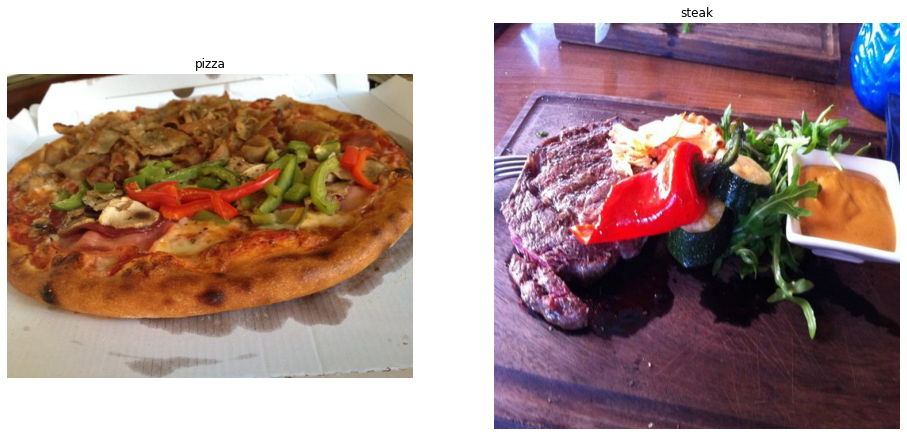

In [ ]:
target_dir = "pizza_steak/train/"
target_class = ["pizza","steak"]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
img1 = view_random_image(target_dir, target_class[0])
plt.subplot(1,2,2)
img2 = view_random_image(target_dir, target_class[1])

### 2. Preprocessing the data (prepare it for a model)

In [ ]:
# Define a directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A bath is a small subset of data. Rather look at all ~10,000 images at one time, a model only look at 32 images at a time. 

It does this for a couple reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (or GPU).
2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...
https://twitter.com/ylecun/status/989610208497360896

In [ ]:
# Create train and test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample from train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

array([[[0.47058827, 0.40784317, 0.34509805],
        [0.4784314 , 0.427451  , 0.3647059 ],
        [0.48627454, 0.43529415, 0.37254903],
        ...,
        [0.8313726 , 0.70980394, 0.48627454],
        [0.8431373 , 0.73333335, 0.5372549 ],
        [0.87843144, 0.7725491 , 0.5882353 ]],

       [[0.50980395, 0.427451  , 0.36078432],
        [0.5058824 , 0.42352945, 0.35686275],
        [0.5137255 , 0.4431373 , 0.3647059 ],
        ...,
        [0.82745105, 0.7058824 , 0.48235297],
        [0.82745105, 0.70980394, 0.5058824 ],
        [0.8431373 , 0.73333335, 0.5372549 ]],

       [[0.5254902 , 0.427451  , 0.34901962],
        [0.5372549 , 0.43921572, 0.36078432],
        [0.5372549 , 0.45098042, 0.36078432],
        ...,
        [0.82745105, 0.7019608 , 0.4784314 ],
        [0.82745105, 0.7058824 , 0.49411768],
        [0.8352942 , 0.7176471 , 0.5137255 ]],

       ...,

       [[0.77647066, 0.5647059 , 0.2901961 ],
        [0.7803922 , 0.53333336, 0.22352943],
        [0.79215693, 0

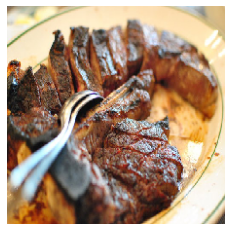

In [ ]:
plt.imshow(images[0])
plt.axis("off")
images[0]

### 3. Create a CNN model (start with base line)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you coulde create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required. (e.g look at which current model is perform best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

🛠 **Practice:** Try to understand what going on in CNN https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# summary our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Train the model

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 1.8490 - accuracy: 0.5373 - val_loss: 0.6150 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5340 - accuracy: 0.7387 - val_loss: 0.4375 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4207 - accuracy: 0.8160 - val_loss: 0.3876 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3059 - accuracy: 0.8860 - val_loss: 0.3493 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1853 - accuracy: 0.9393 - val_loss: 0.4353 - val_accuracy: 0.8120


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 139ms/step - loss: 0.4353 - accuracy: 0.8120


[0.4352564215660095, 0.8119999766349792]

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 136ms/step - loss: 0.3438 - accuracy: 0.8560


[0.34384840726852417, 0.8560000061988831]

### 5. Evaluating model

It looks like our model is learning something, let's evaluate it.

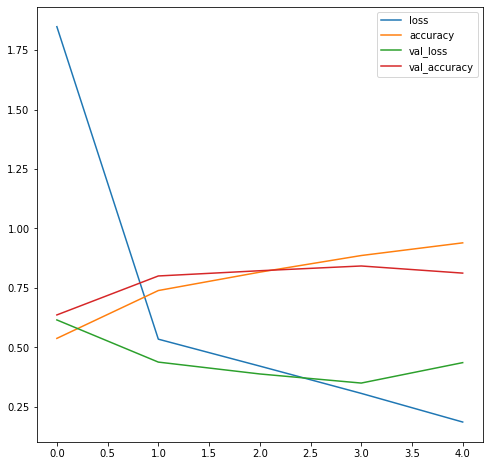

In [ ]:
import pandas as pd

fig, ax = plt.subplots(figsize=(8,8))
df = pd.DataFrame(history_4.history).plot(ax=ax)

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs 

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

>🔑**Note:** When **val_loss starts to increase**, it's likely that the model is overfitting

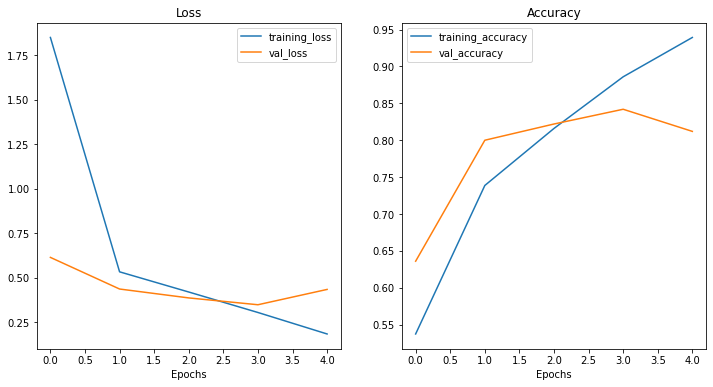

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model

Fitting the model comes in 3 steps:
0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting:
* Increase number of conv layers.
* Increase number of filters.
* Add another dense layer to the output of our flattened layer.

Ways to reduce overfitting:
* Add data augmentation.
* Add regularization layers (such as MaxPool2D).
* Add more data ...

>🔑 **Note:** reducing over overfitting also known as  **regularization**

In [ ]:
# Let's create a baseline model
model_5 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=(2,2)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6613 - accuracy: 0.6047 - val_loss: 0.5263 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4695 - accuracy: 0.7887 - val_loss: 0.3710 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4223 - accuracy: 0.8173 - val_loss: 0.3528 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4215 - accuracy: 0.8140 - val_loss: 0.3441 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3940 - accuracy: 0.8227 - val_loss: 0.3685 - val_accuracy: 0.8520


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.3438 - accuracy: 0.8560


[0.3438483774662018, 0.8560000061988831]

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

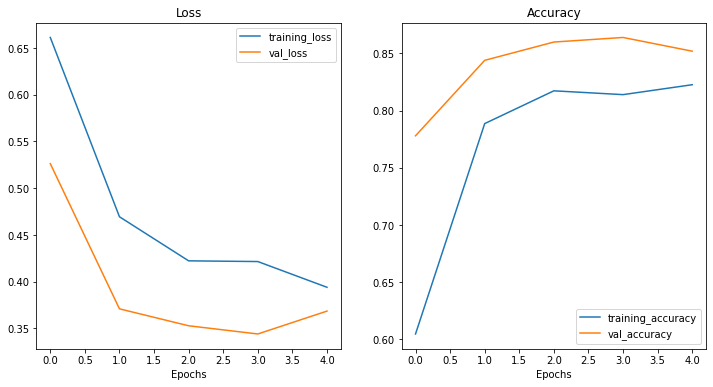

In [ ]:
plot_loss_curves(history_5)

### Opening bag of tricks and data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

>🤔**Question:** What is data augmentation?

- The process of altering our training data, leading it to have more diversit and in turn allowing our model to learn more generalizable patterns.
- Altering meaning adjust the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
IMG_SIZE = (224,224)
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstation purpose only
                                                                   
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


>🔑**Note:** Data augmenation usually only performed on the training data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in diretories but are modified when load into the model

Finally, let's visualize some augmented training data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next()

In [ ]:
# Show original and augmeted one
import random

def show_og_and_aug(train_image, train_image_augmented):
  random_number = random.randint(0, 31) # our batch size are 32
  print(f"Showing image number {random_number}")
  plt.figure(figsize=(12,6))
  plt.subplot(1, 2, 1)
  plt.imshow(train_image[random_number])
  plt.title("Original image")
  plt.axis(False)
  
  plt.subplot(1, 2, 2)
  plt.imshow(train_image_augmented[random_number])
  plt.title("Augmented image")
  plt.axis(False)


Showing image number 18


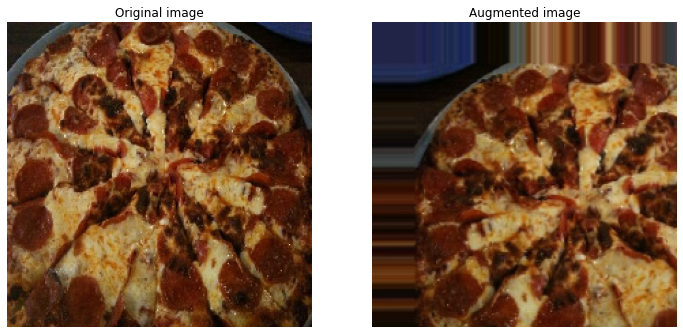

In [ ]:
show_og_and_aug(images, augmented_images)

### Create the model same as the baseline but with augmented data

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 478ms/step - loss: 0.7379 - accuracy: 0.4240 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6937 - accuracy: 0.4133 - val_loss: 0.6930 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6935 - accuracy: 0.4827 - val_loss: 0.6929 - val_accuracy: 0.5220
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6928 - accuracy: 0.5160 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6939 - accuracy: 0.4960 - val_loss: 0.6927 - val_accuracy: 0.5280


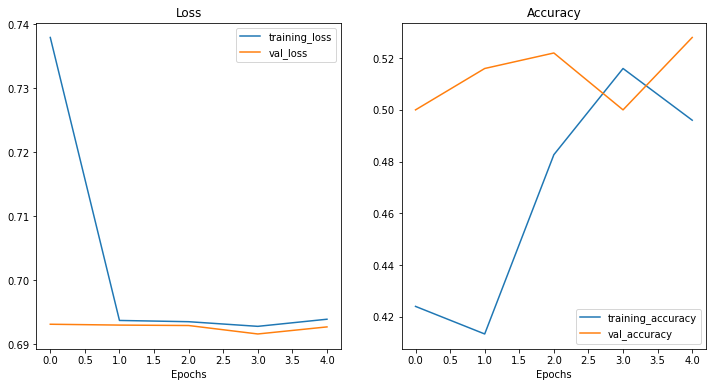

In [ ]:
# Check out model training curves
plot_loss_curves(history_6)

Let's shuffle our training data and see what's happend

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) 

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)
history_7_shuffled = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 0.6549 - accuracy: 0.6073 - val_loss: 0.5225 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5562 - accuracy: 0.7247 - val_loss: 0.4424 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5308 - accuracy: 0.7473 - val_loss: 0.4222 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5144 - accuracy: 0.7613 - val_loss: 0.4264 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5004 - accuracy: 0.7627 - val_loss: 0.3909 - val_accuracy: 0.8360


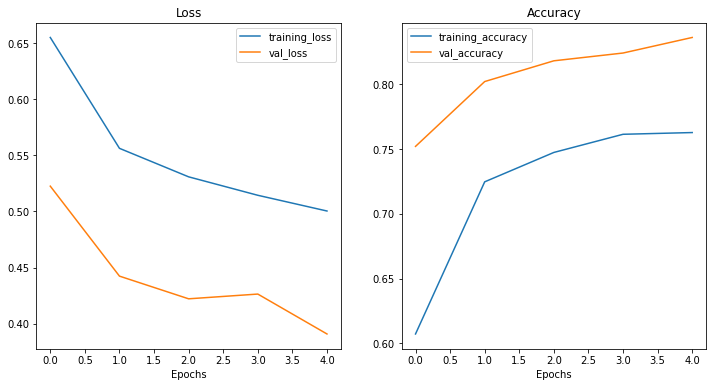

In [ ]:
plot_loss_curves(history_7_shuffled)

### 7. Repeat until sastified

Since we've already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of layers (e.g add more `Conv2D` or `MaxPool2D`).
* Increase the number of filer in each convolution layer (e.g from 10 to 32 to 64).
* Train for longer.
* Find the ideal learning rate.
* Get more data.
* User **transfer learning**

In [ ]:
# Recreate the tiny VGG model on CNN explainer but with augmented training data
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 22s 464ms/step - loss: 0.6525 - accuracy: 0.6033 - val_loss: 0.4907 - val_accuracy: 0.7780
Epoch 2/10
47/47 [==============================] - 22s 478ms/step - loss: 0.5612 - accuracy: 0.7167 - val_loss: 0.3883 - val_accuracy: 0.8520
Epoch 3/10
47/47 [==============================] - 22s 477ms/step - loss: 0.5164 - accuracy: 0.7600 - val_loss: 0.5210 - val_accuracy: 0.7500
Epoch 4/10
47/47 [==============================] - 22s 459ms/step - loss: 0.5000 - accuracy: 0.7627 - val_loss: 0.4631 - val_accuracy: 0.7780
Epoch 5/10
47/47 [==============================] - 23s 480ms/step - loss: 0.5051 - accuracy: 0.7647 - val_loss: 0.3722 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 22s 475ms/step - loss: 0.4796 - accuracy: 0.7753 - val_loss: 0.4292 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4831 - accuracy: 0.7767 - val_loss: 0.3459 - val_accuracy: 0.8680

## Making prediction with trained model on our own images

In [ ]:
# classes we're working on with
class_names

['steak', 'pizza']

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-06 05:25:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2021-08-06 05:25:46 (19.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

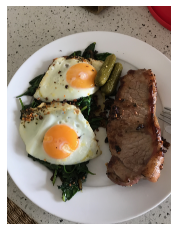

In [ ]:
import matplotlib.image as mpimg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# model_8.predict(steak) 
# throws an error because expected 4 dims but only receive 3 dims

In [ ]:
steak_tf = tf.expand_dims(steak, axis=0)
steak_tf.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
# model_8.predict(steak_tf)
# throws an error because the input shape is (None, 224, 224, 3) but we prompt an image that shape [1, 4032, 3024, 3]

>🔑**Note:** When you train a neuron network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import and preprocess that image to be able to be used with our model
def load_and_prep_image(file_name, image_shape=224):
  """
  Reads an image from file name, turns it into a tensor and reshapes it into (img_shape, image_shape, color_chanels)
  """
  # Read an image 
  img = tf.io.read_file(file_name)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=(image_shape, image_shape))
  # Rescale the image (normalize)
  img = img/255

  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [ ]:
model_7.predict(tf.expand_dims(steak, axis=0))

array([[0.7597534]], dtype=float32)

Look like our custom image is being put through our model, however, it currently ouputs a prediction probability.

In [ ]:
def predict(model, class_names, file_name):
  img = load_and_prep_image(file_name)
  predict = model.predict(tf.expand_dims(img, axis=0))
  if len(predict[0])>1:
    predicted_class = class_names[tf.argmax(predict[0])]
  else:
    predicted_class = class_names[int(tf.round(predict[0]))]
  # print(predict, int(tf.round(predict)))
  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis(False)
  plt.show()

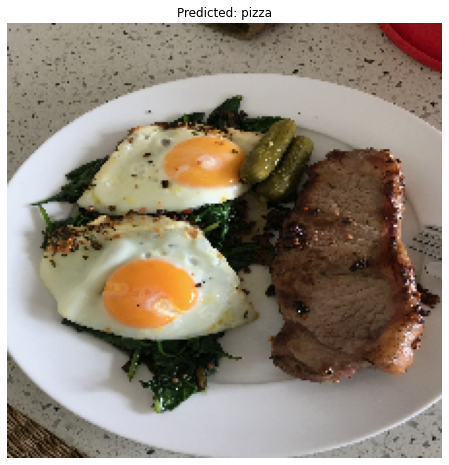

In [ ]:
predict(model_8,class_names,"03-steak.jpeg" )

# Multi-class Image classification

Now, we're going to set things up a notch with 10 classes of food. (multi-class classification).
1. Become one with data.
2. Preprocess data.
3. Create model, start with a baseline.
4. Fit the model (overfit it to make sure it work).
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model (try to beat the baseline and reduce overfitting).
7. Repeat until sastified.

### 1. Become one with data

Data source : [10-class-foods](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)



In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-06 05:25:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   240MB/s    in 2.1s    

2021-08-06 05:25:50 (240 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

for dir_path, dir_name, file_name in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} images in {dir_path}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 10 directories and 0 imag

In [ ]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the subdirectories
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

['3020120.jpg']
Image shape (512, 512, 3)


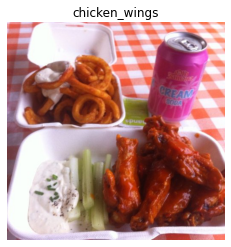

In [ ]:
# Visualize random image from train data
img = view_random_image("10_food_classes_all_data/train/", random.choice(class_names))

### 2. Preprocess data

In [ ]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with baseline)

Why don't we use the model from CNN explainer for our problems???

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
# Build a model
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [ ]:
model_8.compile(
    loss= "categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

### 4. Fit the model

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 196ms/step - loss: 2.1340 - accuracy: 0.2239 - val_loss: 1.9540 - val_accuracy: 0.2916
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 1.8135 - accuracy: 0.3749 - val_loss: 1.7920 - val_accuracy: 0.3844
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4640 - accuracy: 0.5111 - val_loss: 1.9055 - val_accuracy: 0.3656
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 0.9463 - accuracy: 0.6899 - val_loss: 2.3782 - val_accuracy: 0.3328
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.4407 - accuracy: 0.8619 - val_loss: 2.9252 - val_accuracy: 0.3136


### 5. Evaluate the model

In [ ]:
# Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 2.9252 - accuracy: 0.3136


[2.9251606464385986, 0.31360000371932983]

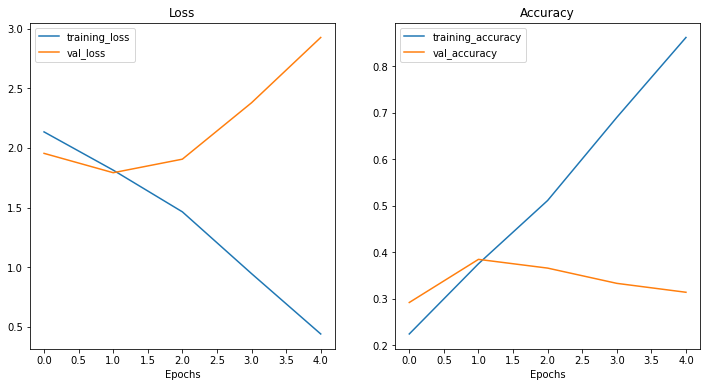

In [ ]:
plot_loss_curves(history_8)

What does the loss curves tell us?

It's seem our model is **overfitting** the training set badly

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Let's try and fix overfitting by:
* **Get more data:** 
* **Simplify the model**
* **Use data agumentation**
* **Use transfer learning**

In [ ]:
# Let's try a simplify model
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [ ]:
model_9.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 180ms/step - loss: 2.3027 - accuracy: 0.1960 - val_loss: 2.0452 - val_accuracy: 0.2832
Epoch 2/5
235/235 [==============================] - 42s 178ms/step - loss: 1.9339 - accuracy: 0.3288 - val_loss: 1.9538 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.7025 - accuracy: 0.4271 - val_loss: 1.9633 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 1.3992 - accuracy: 0.5347 - val_loss: 2.0525 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 1.0628 - accuracy: 0.6572 - val_loss: 2.2508 - val_accuracy: 0.2912


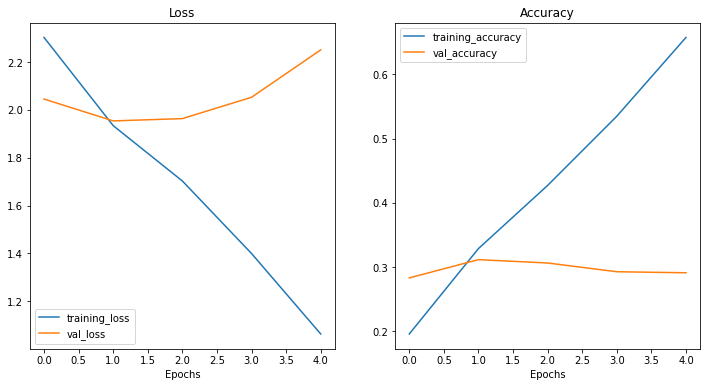

In [ ]:
plot_loss_curves(history_9)

Damn, our simplified model didn't work, soo let's try another method

### Trying to reduce overfitting by Data Augmentation

In [ ]:
# Create datagenerator but with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True) # shuffled is set to True as default

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="categorical",
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on augmented data
model_10 = tf.keras.models.clone_model(model_8)

In [ ]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [ ]:
model_10.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 473ms/step - loss: 2.2146 - accuracy: 0.1624 - val_loss: 2.0831 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 110s 470ms/step - loss: 2.0920 - accuracy: 0.2513 - val_loss: 1.9186 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0202 - accuracy: 0.2875 - val_loss: 1.8637 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 1.9686 - accuracy: 0.3125 - val_loss: 1.8446 - val_accuracy: 0.3560
Epoch 5/5
235/235 [==============================] - 110s 467ms/step - loss: 1.9164 - accuracy: 0.3436 - val_loss: 1.7361 - val_accuracy: 0.3988


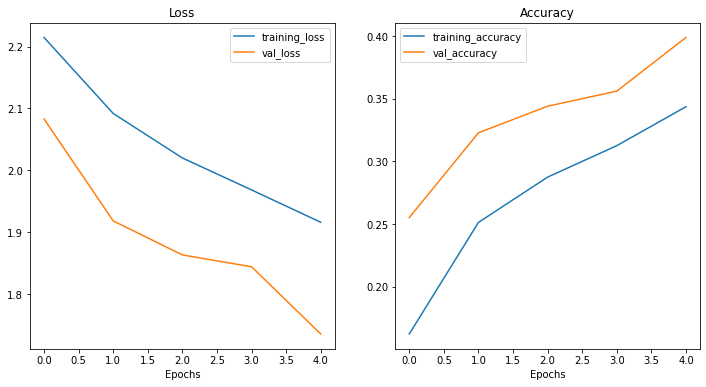

In [ ]:
plot_loss_curves(history_10)

That looks much better, loss curves are much closer to each other the baseline model's loss curves

### 7. Repeat until sastified

We could keep going here... continally truying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units).
- adjust the learning rate.
- try different methods of data augmentation (adjust the hyperparameter in the `ImageDataGenerator`).

### Making prediction with our custom data

In [ ]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-06 05:44:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2021-08-06 05:44:34 (50.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-08-06 05:44:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
files_test = ["03-hamburger.jpeg", "03-pizza-dad.jpeg", "03-steak.jpeg", "03-sushi.jpeg"]

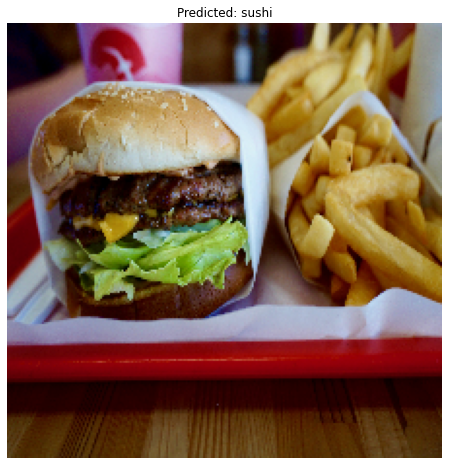

In [ ]:
# Make prediction using model 10
predict(model_10, class_names, files_test[0])

Damn, our model's predict is wrong af. Because the accuracy only ~30%. Well, try to improve the model better.

## Saving and load our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.7361 - accuracy: 0.3988


[1.736132025718689, 0.39879998564720154]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.7361 - accuracy: 0.3988


[1.736132025718689, 0.39879998564720154]

Well, Let's try to train model_10 (same architecture as model_8)for longer and see what happend...

In [ ]:
import tensorflow as tf
model_11 = tf.keras.models.clone_model(model_8)

In [ ]:
# rename the layers 
for i, layer in enumerate(model_11.layers):
  layer._name = '_'.join(layer._name.split("_")[:-1])+"_"+str(i)

In [ ]:
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_0 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28090)            

In [ ]:
model_11.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_11 = model_11.fit(train_data_augmented,
                          epochs=20,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 112s 476ms/step - loss: 2.2254 - accuracy: 0.1688 - val_loss: 2.0389 - val_accuracy: 0.2728
Epoch 2/20
235/235 [==============================] - 112s 476ms/step - loss: 2.0979 - accuracy: 0.2455 - val_loss: 1.9604 - val_accuracy: 0.3156
Epoch 3/20
235/235 [==============================] - 110s 470ms/step - loss: 2.0312 - accuracy: 0.2852 - val_loss: 1.9520 - val_accuracy: 0.3108
Epoch 4/20
235/235 [==============================] - 112s 477ms/step - loss: 1.9924 - accuracy: 0.3023 - val_loss: 1.8650 - val_accuracy: 0.3372
Epoch 5/20
235/235 [==============================] - 110s 469ms/step - loss: 1.9413 - accuracy: 0.3225 - val_loss: 1.8568 - val_accuracy: 0.3732
Epoch 6/20
235/235 [==============================] - 112s 475ms/step - loss: 1.9246 - accuracy: 0.3375 - val_loss: 1.7999 - val_accuracy: 0.3924
Epoch 7/20
235/235 [==============================] - 113s 481ms/step - loss: 1.8888 - accuracy: 0.3481 - val_loss: 1.7493 -

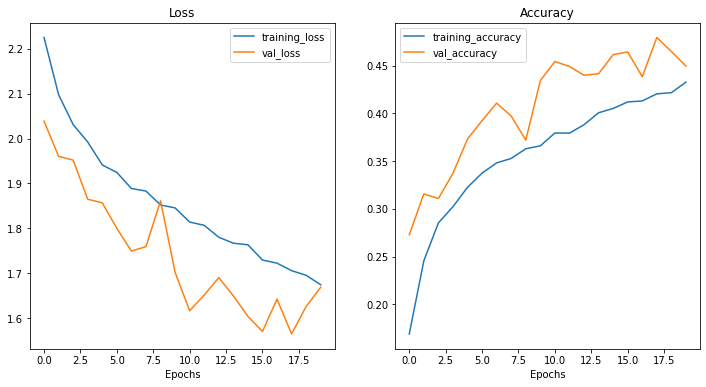

In [ ]:
plot_loss_curves(history_11)

In [ ]:
# Save model in HDF5 file format
model_11.save("trained_model_11.h5")